<a href="https://colab.research.google.com/github/chikum/SiK/blob/AES/2A_Deep_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Neural Network using Keras

In [35]:
!nvidia-smi

Wed May 12 15:19:32 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    28W /  70W |    224MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [112]:
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import layers

import random
import numpy as np

In [113]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of 
                        # numbers will appear every time. 
tf.random.set_seed(42)  # sets the graph-level random seed

## Dataset

In [114]:
# Use the MNIST dataset  of Keras.

mnist = tf.keras.datasets.mnist
(Xtrain, Ytrain) , (Xtest, Ytest) = mnist.load_data()

8


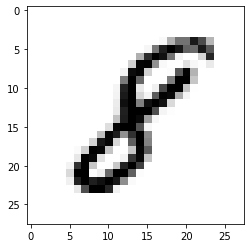

In [115]:
import matplotlib.pyplot as plt
# Only use this if using iPython
%matplotlib inline 
# You may select anything up to 60,000
image_index = 7777 
# The label is 8
print(Ytrain[image_index]) 
plt.imshow(Xtrain[image_index], cmap='Greys')

In [118]:
# size of the datsets

print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [120]:
# print a sample data

print('Xtrain \n', Xtrain[10,10])
print('Xtest \n', Xtest[10,10])
print('Ytrain \n', Ytrain[10])
print('Ytest \n', Ytest[10])

Xtrain 
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  24 209 254 254 254
 171   0   0   0   0   0   0   0   0   0]
Xtest 
 [  0   0   0   0   0   0   0   0 194 254 103   0   0   0   0   0   0   0
   0   0 150 254 213   0   0   0   0   0]
Ytrain 
 3
Ytest 
 0


In [121]:
# Normalize the data
# 60000 input images are in the train set.
# 10000 input images are in the test set.

Xtrain = Xtrain.reshape((60000, 28*28))    # reshape the input set to size 28*28. VEctor of length 784
Xtrain = Xtrain.astype('float32')/255      # normalize to grayscale; set datatype as float32

Xtest = Xtest.reshape((10000, 28*28))      # reshape the input set to size 28*28. 
Xtest = Xtest.astype('float32')/255        # normalize to grayscale; set datatype as float32

Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest)

In [122]:
# print a sample data

print('Xtrain \n', Xtrain[10,10])
print('Xtest \n', Xtest[10,10])
print('Ytrain \n', Ytrain[10])
print('Ytest \n', Ytest[10])

Xtrain 
 0.0
Xtest 
 0.0
Ytrain 
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Ytest 
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## DNN Model

Using Keras, create the DNN or Sequential Model

In [123]:
# Create a model object

dnnModel = models.Sequential()

Add dense layers, specifying the number of units in each layer and the activation function used in the layer.

In [133]:
# Layer 1 = input layer
# specify the input size in the first layer.

dnnModel.add(layers.Dense(100, activation='relu', input_shape= (28*28,)))

# Layer 2 = hidden layer 
dnnModel.add(layers.Dense(120, activation='relu'))

# Layer 3 = hidden layer 
dnnModel.add(layers.Dense(30, activation='relu'))

# Layer 3 = hidden layer 
dnnModel.add(layers.Dense(30, activation='relu'))


# Layer 4 = output layer
dnnModel.add(layers.Dense(10, activation='softmax'))

dnnModel.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_38 (Dense)             (None, 60)                3060      
_________________________________________________________________
dense_39 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_40 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_41 (Dense)             (None, 100)               1100      
_________________________________________________________________
dense_42 (Dense)             (None, 120)               12120     
_________________________________________________________________
dense_43 (Dense)             (None, 30)               

## Regularization and Optimizations of DNN

In [140]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 
        
dnnModel.compile( optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'] )

## Train the Model

In [141]:
# train the model

h  = dnnModel.fit( Xtrain, Ytrain, epochs=25, batch_size=64)

Epoch 1/25
938/938 [==============================] - 4s 3ms/step - loss: 0.0106 - accuracy: 0.9986
Epoch 2/25
938/938 [==============================] - 3s 3ms/step - loss: 0.0027 - accuracy: 0.9995
Epoch 3/25
938/938 [==============================] - 3s 3ms/step - loss: 0.0033 - accuracy: 0.9997
Epoch 4/25
938/938 [==============================] - 3s 3ms/step - loss: 0.0011 - accuracy: 0.9999
Epoch 5/25
938/938 [==============================] - 3s 3ms/step - loss: 0.0013 - accuracy: 0.9999
Epoch 6/25
938/938 [==============================] - 3s 3ms/step - loss: 0.0013 - accuracy: 0.9999
Epoch 7/25
938/938 [==============================] - 3s 3ms/step - loss: 0.0013 - accuracy: 0.9999
Epoch 8/25
938/938 [==============================] - 3s 3ms/step - loss: 2.7070e-04 - accuracy: 0.9999
Epoch 9/25
938/938 [==============================] - 3s 3ms/step - loss: 2.1153e-04 - accuracy: 1.0000
Epoch 10/25
938/938 [==============================] - 3s 3ms/step - loss: 0.0014 - accuracy

In [142]:
print('Final training loss \t', h.history['loss'][-1])
print('Final training accuracy ', h.history['accuracy'][-1])

Final training loss 	 0.0
Final training accuracy  1.0


## Testing the Model

In [143]:
# testing the model

testLoss, testAccuracy = dnnModel.evaluate( Xtest, Ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.5365 - accuracy: 0.9770


In [144]:
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

Testing loss 	 0.5364682078361511
Testing accuracy  0.9769999980926514


# Exercise 

Modify the code to get a better testing accuracy.
- Change the number of hidden units
- Increase the number of hidden layers
- Use a different optimizer